Questions:

Was George Michael more sucessful as a solo artist or as part of Wham!?

Are acoustic songs slower than non acoustic songs? 

Are acoustic songs lower energy / less dancey than non acoustic songs?

What key was most popular for Wham! and George Michael? And what time signature? 

In [2]:
import pandas as pd

In [15]:
import spotipy.util as util
import spotipy
import os.path as path
import matplotlib.pyplot as plt
import seaborn as sns

username = 'ninahew'
client_id ='a758a8092e3b45949388c4123f79948f'
client_secret = 'c8025d9d9bb24c1c8f6156a5f66dcfe1'
redirect_uri = 'http://localhost:7777/callback'
scope = 'user-read-recently-played'

from spotipy.oauth2 import SpotifyClientCredentials

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, 
                                                                              client_secret=client_secret))

In [4]:
wham_search = spotify.search(q='wham!', type='artist')
wham_id = wham_search['artists']['items'][0]['id']
wham_id

'5lpH0xAS4fVfLkACg9DAuM'

In [5]:
gm_search = spotify.search(q='George Michael', type='artist')
gm_id = gm_search['artists']['items'][0]['id']
gm_id

'19ra5tSw0tWufvUp8GotLo'

In [6]:
def is_wham_gm(track):
    all_artist_ids = [artist['id'] for artist in track['artists']]
    if (gm_id in all_artist_ids) or (wham_id in all_artist_ids):
        return True
    else:
        return False

df = pd.DataFrame()
filepath = "../data/George Michael Wham Back Catalogue.csv"
if not path.exists(filepath):
    artists = [wham_id, gm_id]
    for artist in artists: 
        albums = spotify.artist_albums(artist)
        for album in albums['items']:
            tracks = spotify.album_tracks(album['id'])
            for track in tracks['items']:
                if is_wham_gm(track):
                    full_track = spotify.track(track['id'])
                    audio_features = spotify.audio_features(track['id'])[0]
                    audio_features['track_name'] = track['name']
                    audio_features['album_name'] = album['name']
                    audio_features['album_type'] = album['album_type']
                    audio_features['artist'] = ', '.join(sorted([artist['name'] for artist in track['artists']]))
                    audio_features['release_date'] = album['release_date']
                    audio_features['popularity'] = full_track['popularity']
                    df = df.append(audio_features, ignore_index=True)
    df.to_csv(path_or_buf = filepath)
else:
    df = pd.read_csv(filepath)
    
df.sample(3)

,Unnamed: 0,acousticness,album_name,album_type,analysis_url,artist,danceability,duration_ms,energy,id,...,popularity,release_date,speechiness,tempo,time_signature,track_href,track_name,type,uri,valence
280,280,0.30700,True Faith,single,https://api.spotify.com/v1/audio-analysis/6OYt...,George Michael,0.555,261627.0,0.470,6OYt5mI4RIr79P2cRC2sNk,...,22.0,2011-03-13,0.0265,103.218,4.0,https://api.spotify.com/v1/tracks/6OYt5mI4RIr7...,True Faith,audio_features,spotify:track:6OYt5mI4RIr79P2cRC2sNk,0.121
194,194,0.00556,Patience,album,https://api.spotify.com/v1/audio-analysis/6Hwg...,George Michael,0.714,411133.0,0.877,6HwgNXpldZ0WfY4kzJgexr,...,51.0,2004-03-15,0.0616,124.960,4.0,https://api.spotify.com/v1/tracks/6HwgNXpldZ0W...,Flawless (Go to the City),audio_features,spotify:track:6HwgNXpldZ0WfY4kzJgexr,0.766
4,4,0.01060,Uma Segunda Chance para Amar (Trilha Sonora Or...,album,https://api.spotify.com/v1/audio-analysis/5fVt...,George Michael,0.904,196649.0,0.540,5fVtRR2oTFwmYnddwTmJ4Y,...,19.0,2019-11-08,0.1400,95.849,4.0,https://api.spotify.com/v1/tracks/5fVtRR2oTFwm...,Faith - Remastered,audio_features,spotify:track:5fVtRR2oTFwmYnddwTmJ4Y,0.566


In [7]:
var_artists = df['artist'].unique()[2:]
var_artists

array(['George Michael, Nile Rodgers', 'George Michael, Paul McCartney',
       'Astrud Gilberto, George Michael',
       'George Michael, Mary J. Blige, Tommy Theo, Waze & Odyssey',
       'George Michael, Kinky Roland',
       'George Michael, Phil Romano, Steve Redant',
       'George Michael, Stereogamous', 'George Michael, Voodoo Sonics',
       'George Michael, James Jackman', 'David Kay, George Michael'],
      dtype=object)

In [8]:
df = df[df['artist'].isin(['Wham!', 'George Michael'])]
df = df[df['release_date'] < '2016-12-25']
df.sample(10)

,Unnamed: 0,acousticness,album_name,album_type,analysis_url,artist,danceability,duration_ms,energy,id,...,popularity,release_date,speechiness,tempo,time_signature,track_href,track_name,type,uri,valence
223,223,0.0520,Older,album,https://api.spotify.com/v1/audio-analysis/6Sae...,George Michael,0.735,324667.0,0.640,6SaeXxdt0Id6ZzmX0ZGTQK,...,63.0,1996-05-13,0.0720,104.444,4.0,https://api.spotify.com/v1/tracks/6SaeXxdt0Id6...,"Fastlove, Pt. 1",audio_features,spotify:track:6SaeXxdt0Id6ZzmX0ZGTQK,0.5510
275,275,0.0777,White Light EP,single,https://api.spotify.com/v1/audio-analysis/3ct2...,George Michael,0.660,275279.0,0.718,3ct2wOfYEeosR4kZxIp41H,...,31.0,2012-01-01,0.0652,122.998,4.0,https://api.spotify.com/v1/tracks/3ct2wOfYEeos...,White Light,audio_features,spotify:track:3ct2wOfYEeosR4kZxIp41H,0.3460
76,76,0.2870,"Wham 12"" Mixes",compilation,https://api.spotify.com/v1/audio-analysis/3kRL...,Wham!,0.875,389773.0,0.622,3kRLA6tLTlFR5ll80NULRE,...,46.0,1985-01-03,0.0298,114.958,4.0,https://api.spotify.com/v1/tracks/3kRLA6tLTlFR...,Everything She Wants - Remix,audio_features,spotify:track:3kRLA6tLTlFR5ll80NULRE,0.9180
49,49,0.0335,Fantastic,album,https://api.spotify.com/v1/audio-analysis/55te...,Wham!,0.732,207933.0,0.836,55teLoqzgI0Wh9NjpSpWHA,...,22.0,1983-07-09,0.0593,146.367,4.0,https://api.spotify.com/v1/tracks/55teLoqzgI0W...,Love Machine - Instrumental Remix,audio_features,spotify:track:55teLoqzgI0Wh9NjpSpWHA,0.9520
162,162,0.1020,Symphonica,album,https://api.spotify.com/v1/audio-analysis/71Z3...,George Michael,0.429,195958.0,0.824,71Z3DZX7GV7TebplvVawmp,...,7.0,2014-01-01,0.1290,118.629,3.0,https://api.spotify.com/v1/tracks/71Z3DZX7GV7T...,Feeling Good - Live,audio_features,spotify:track:71Z3DZX7GV7TebplvVawmp,0.4120
250,250,0.0239,Faith,album,https://api.spotify.com/v1/audio-analysis/0zu7...,George Michael,0.569,447613.0,0.905,0zu7hnEiRKnkJ5yslvBfky,...,23.0,1987-10-30,0.1500,195.572,4.0,https://api.spotify.com/v1/tracks/0zu7hnEiRKnk...,Monkey - A cappella Remastered,audio_features,spotify:track:0zu7hnEiRKnkJ5yslvBfky,0.3960
190,190,0.0617,Patience,album,https://api.spotify.com/v1/audio-analysis/4MBi...,George Michael,0.847,351067.0,0.510,4MBi4GO44Y7Gl3bINIgDS1,...,33.0,2004-03-15,0.0420,110.003,4.0,https://api.spotify.com/v1/tracks/4MBi4GO44Y7G...,Cars and Trains,audio_features,spotify:track:4MBi4GO44Y7Gl3bINIgDS1,0.5650
224,224,0.1470,Older,album,https://api.spotify.com/v1/audio-analysis/1oMN...,George Michael,0.572,333107.0,0.439,1oMNeGkqwyEOLMUTrgdIr2,...,47.0,1996-05-13,0.0258,147.741,4.0,https://api.spotify.com/v1/tracks/1oMNeGkqwyEO...,Older,audio_features,spotify:track:1oMNeGkqwyEOLMUTrgdIr2,0.0794
159,159,0.0838,Symphonica,album,https://api.spotify.com/v1/audio-analysis/0fQD...,George Michael,0.552,298052.0,0.554,0fQDbOYcVFnxXrD4XBXAyL,...,7.0,2014-01-01,0.0282,127.929,4.0,https://api.spotify.com/v1/tracks/0fQDbOYcVFnx...,Praying For Time - Live,audio_features,spotify:track:0fQDbOYcVFnxXrD4XBXAyL,0.1800
259,259,0.0955,Faith,album,https://api.spotify.com/v1/audio-analysis/2nzP...,George Michael,0.683,306120.0,0.879,2nzPzkGP9QSZ1lqvXTfyzT,...,42.0,1987-10-30,0.0459,97.062,4.0,https://api.spotify.com/v1/tracks/2nzPzkGP9QSZ...,Monkey - Remastered,audio_features,spotify:track:2nzPzkGP9QSZ1lqvXTfyzT,0.7020


In [9]:
list(df.columns)

['Unnamed: 0',
 'acousticness',
 'album_name',
 'album_type',
 'analysis_url',
 'artist',
 'danceability',
 'duration_ms',
 'energy',
 'id',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'popularity',
 'release_date',
 'speechiness',
 'tempo',
 'time_signature',
 'track_href',
 'track_name',
 'type',
 'uri',
 'valence']

In [10]:
df.sort_values('release_date', ascending = True, inplace = True)
plt.figure(figsize=(15,8))
plt.xticks(rotation = 90)


sns.scatterplot(x = df['album_name'], y = df['popularity'], hue = df['artist'], )

NameError: name 'plt' is not defined

In [11]:
plt.figure(figsize=(15,8))
sns.boxplot(data = df, x= 'popularity', y = 'artist')

NameError: name 'plt' is not defined

In [28]:
df[['artist''track_name', 'popularity']].sort_values('popularity').head(3)

,track_name,popularity
279,True Faith,0.0
35,Last Christmas - Pudding Mix,0.0
169,You've Changed - Live,4.0


In [29]:
df[['track_name', 'popularity']].sort_values('popularity').tail(3)

,track_name,popularity
50,Club Tropicana,68.0
252,Faith - Remastered,74.0
36,Wake Me up Before You Go-Go,79.0


In [165]:
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

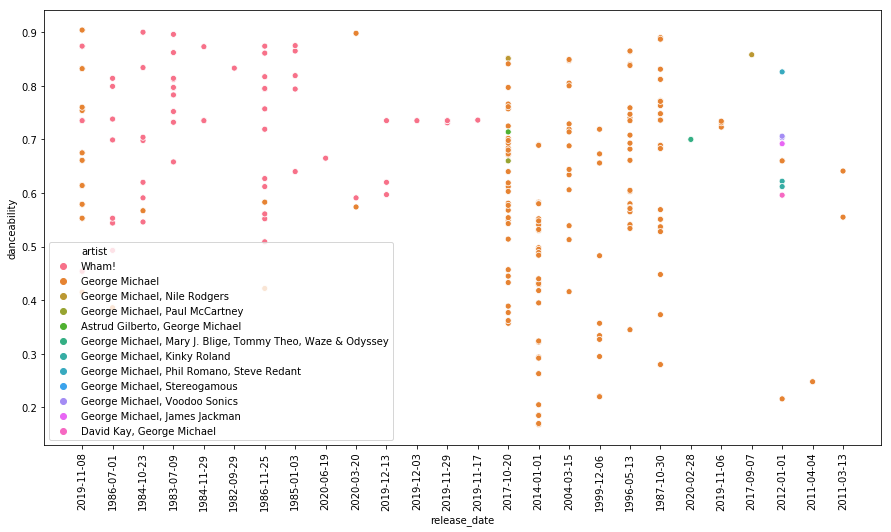

In [166]:
df.loc['release_date'] = pd.to_datetime(df['release_date'], format="%Y/%m/%d")
df2 = df[['release_date', 'danceability', 'artist']]
df2.sort_values('release_date', ascending= True)
plt.figure(figsize=(15,8))
plt.xlabel('Release Date')
plt.xticks(rotation = 90)
plt.ylabel('Danceability')
plot = sns.scatterplot(x = df2['release_date'], y = df2['danceability'], hue = df2['artist'])
plot
#Need to sort x axis 
#Need to consider whether to change artists to 'various'

In [ ]:
df_artists

In [ ]:
df.loc['release_date'] = pd.to_datetime(df['release_date'], format="%Y/%m/%d")
df2 = df[['release_date', 'danceability', 'artist']]
df2.replace(to_replace = var_artists)
df2.sort_values('release_date', ascending= True)
plt.figure(figsize=(15,8))
plt.xlabel('Release Date')
plt.xticks(rotation = 90)
plt.ylabel('Danceability')
plot = sns.scatterplot(x = df2['release_date'], y = df2['danceability'], hue = df2['artist'])
plot

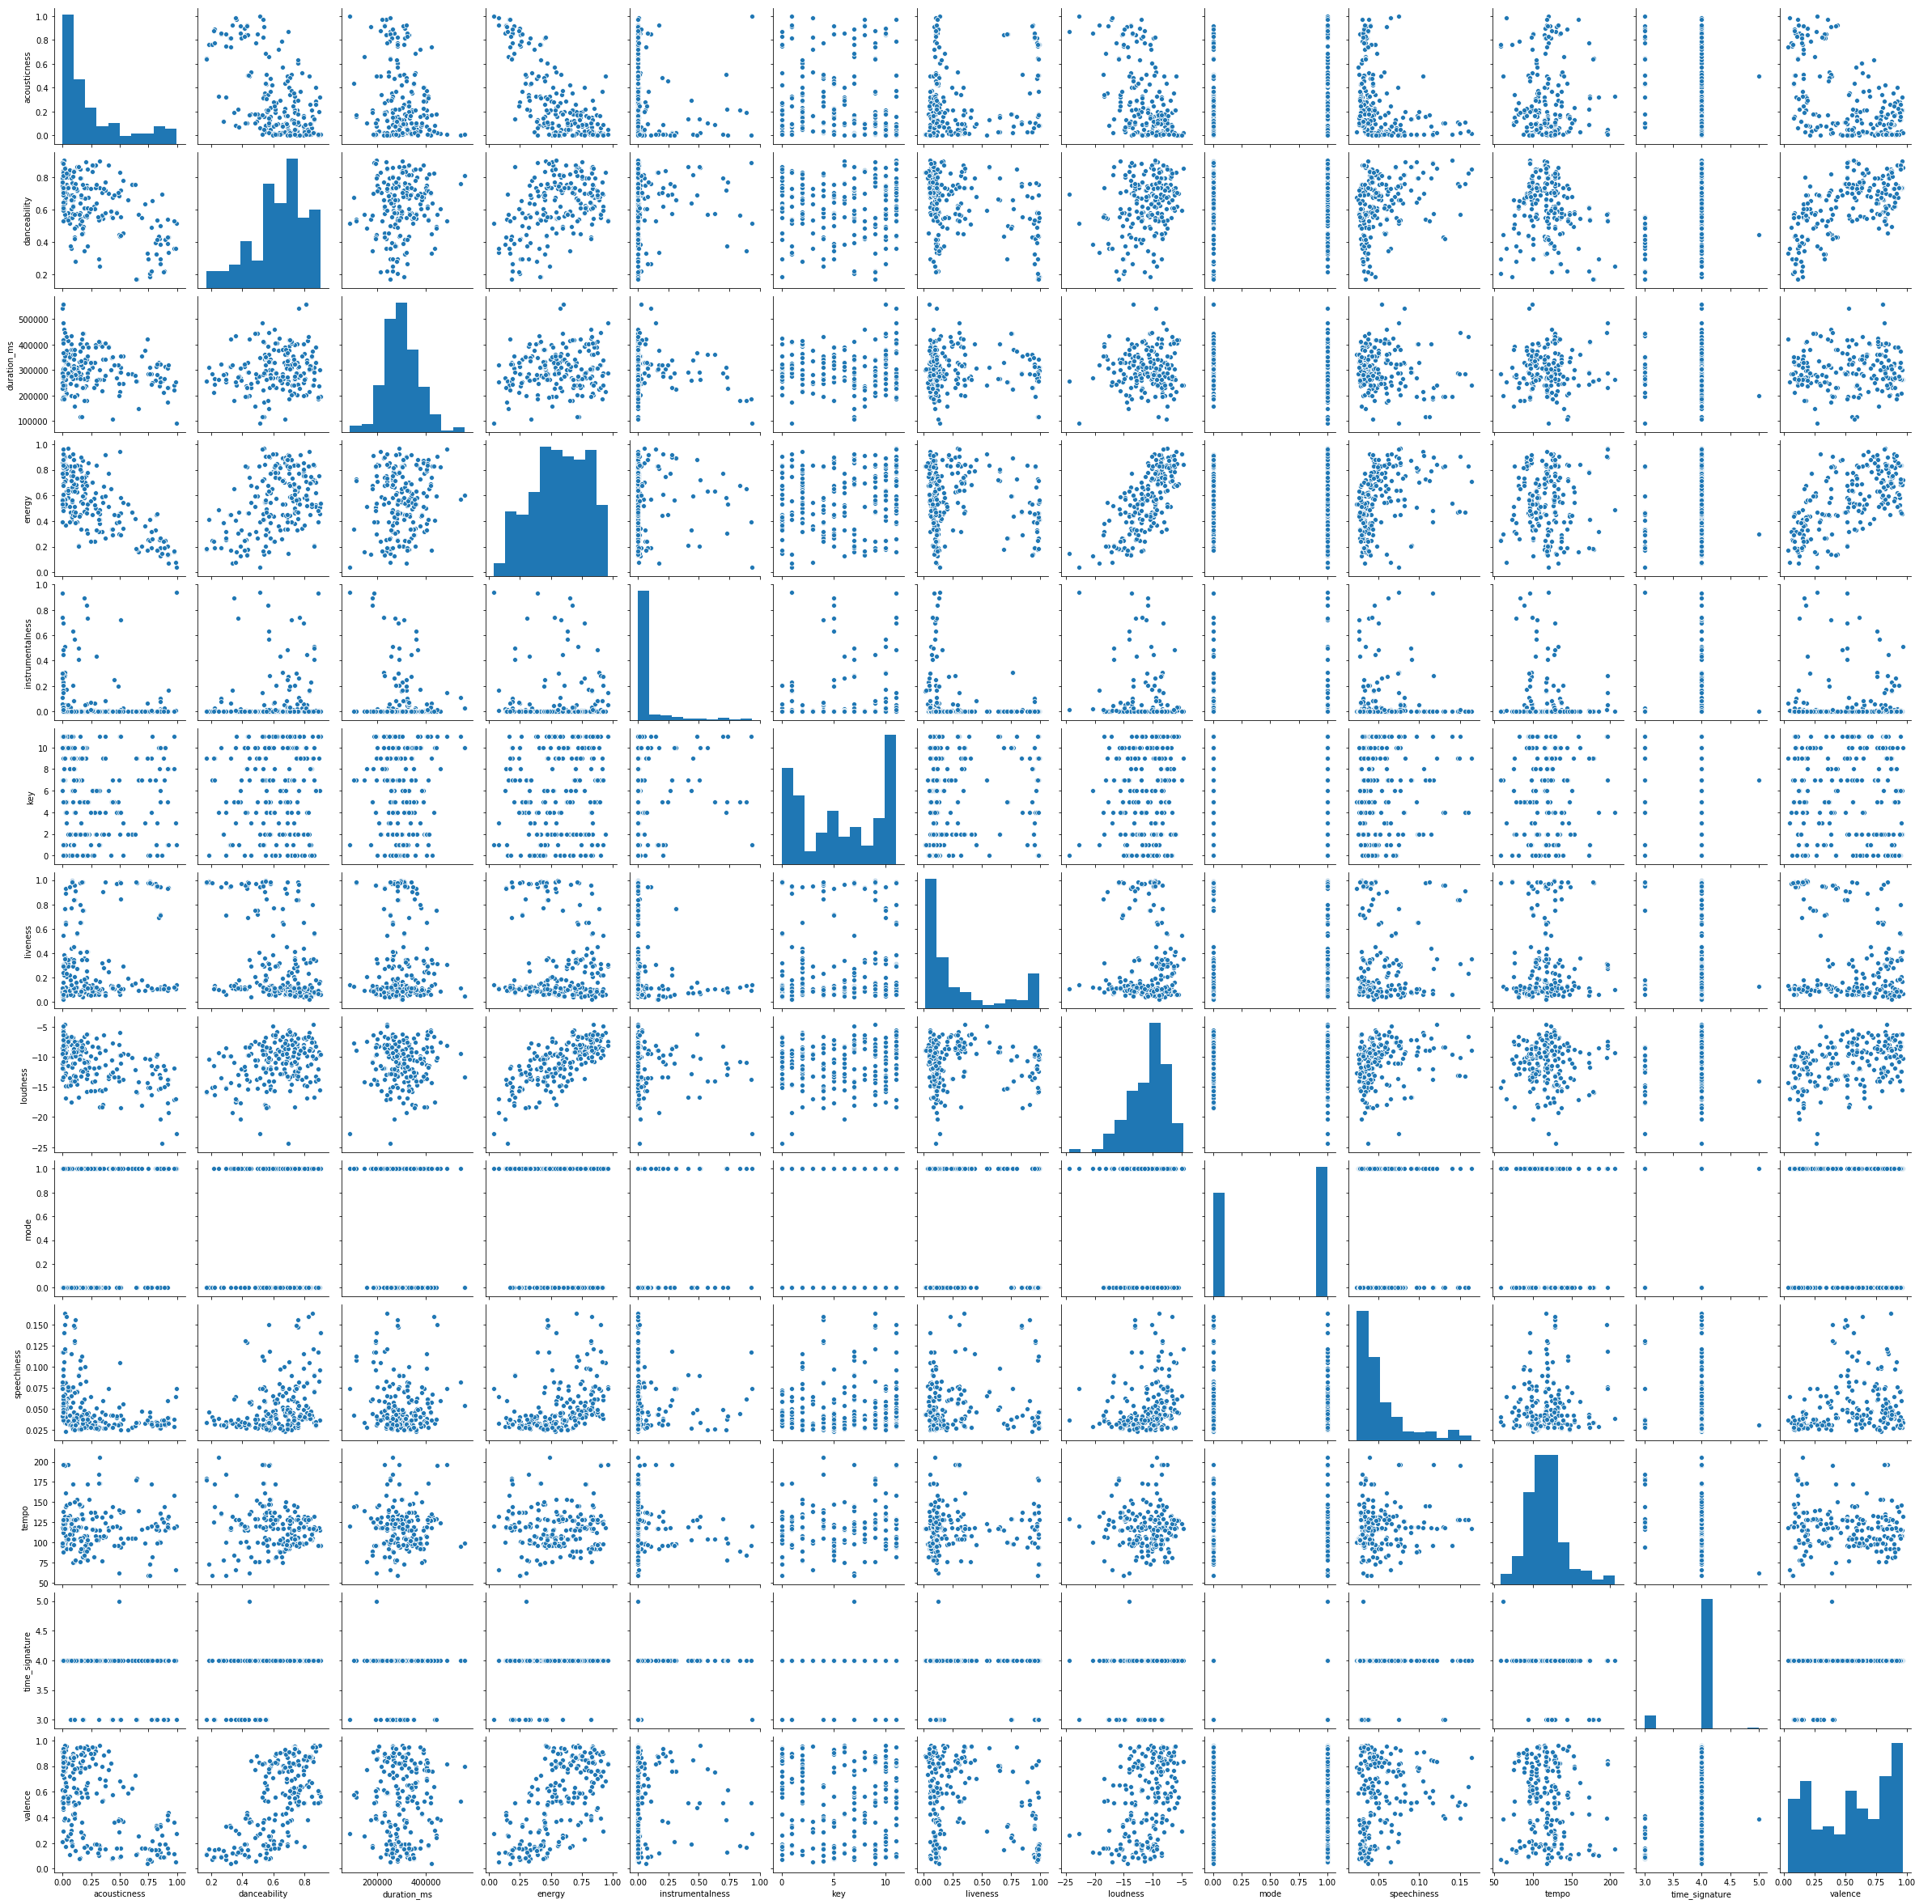

In [79]:
sns.pairplot(df)

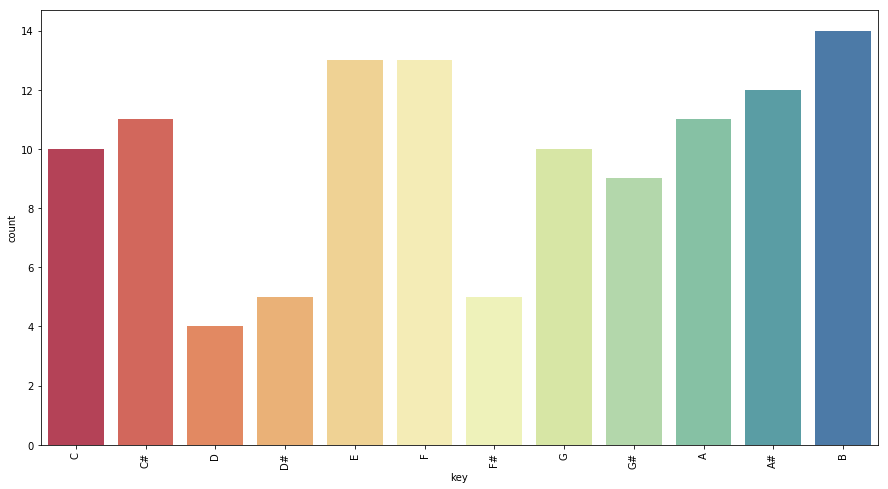

In [27]:
dfgm = df[df['artist']== 'George Michael'].sort_values('key')
dfgm['key']
plt.figure(figsize=(15,8))
plt.xticks(rotation = 90)

keys = ["C","C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]

dfgm['key'] = dfgm['key'].map(lambda i : keys[int(i)])

sns.countplot(x= dfgm['key'],palette = 'Spectral')

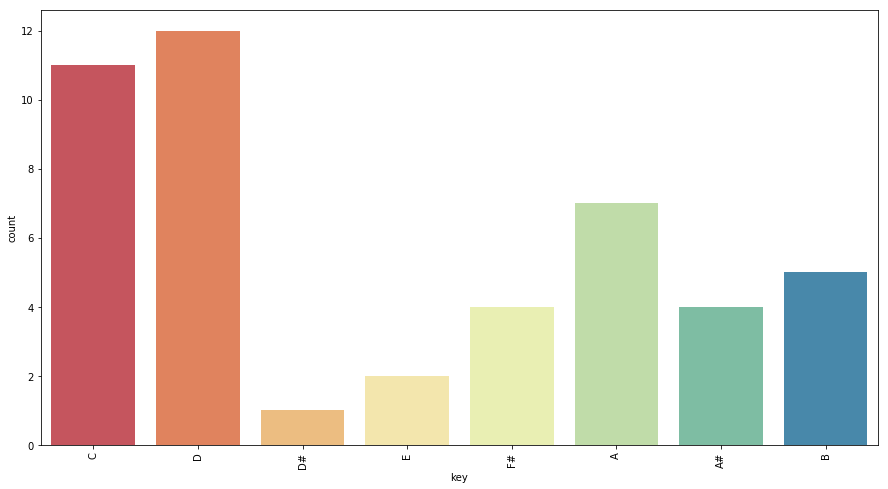

In [26]:
dfwham = df[df['artist']== 'Wham!'].sort_values('key')
plt.figure(figsize=(15,8))
plt.xticks(rotation = 90)

keys = ["C","C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]

dfwham['key'] = dfwham['key'].map(lambda i : keys[int(i)])

sns.countplot(x= dfwham['key'], palette = 'Spectral')

In [12]:
dfwham = df[df['artist']== 'Wham!'].sort_values('time_signature')
dfwham
plt.figure(figsize=(15,8))
plt.xticks(rotation = 90)
sns.boxplot(dfwham['time_signature'])

NameError: name 'plt' is not defined

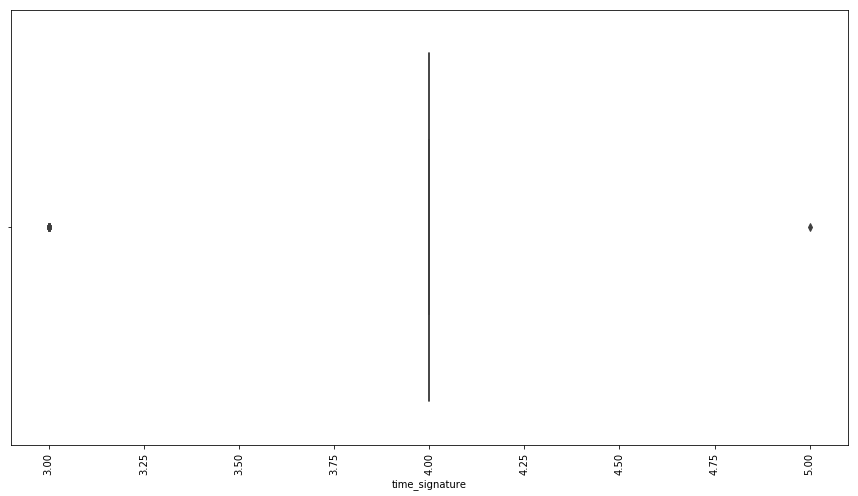

In [138]:
dfgm = df[df['artist']== 'George Michael'].sort_values('time_signature')
dfgm
plt.figure(figsize=(15,8))
plt.xticks(rotation = 90)
sns.boxplot(dfgm['time_signature'])

In [149]:
dfgm = df[df['artist']== 'George Michael'].sort_values('time_signature')
dfgm['time_signature'].unique()

array([3., 4., 5.])

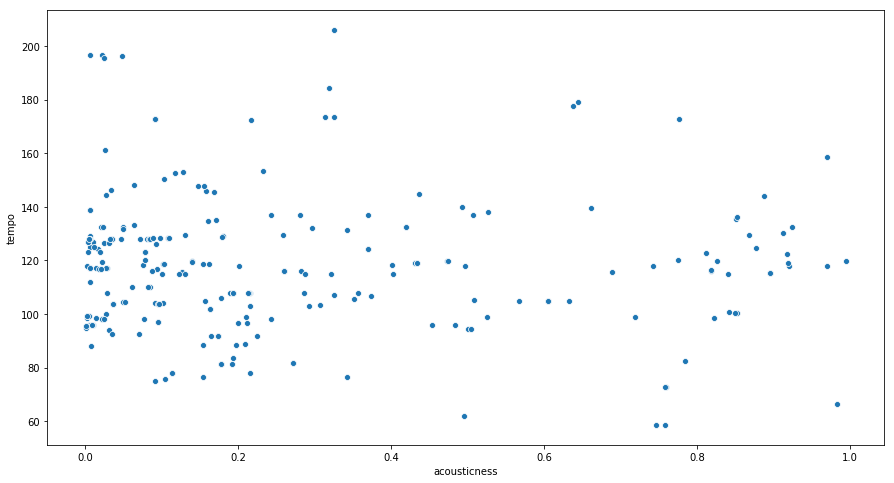

In [158]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = df['acousticness'], y = df['tempo'])
#No correlation 

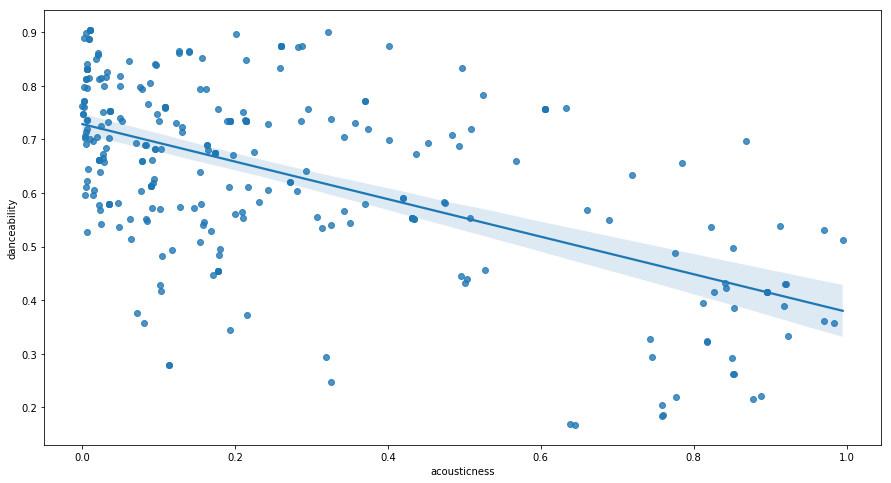

In [160]:
plt.figure(figsize=(15,8))
sns.regplot(x = df['acousticness'], y = df['danceability'])
#Very weak negative correlation